In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names=['symboling','normalized_losses','make','fuel_type','aspiration','number_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','car_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
number_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [3]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
number_of_doors       object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
car_weight             int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [4]:
#Dropping below columns since they have low variance(The records in the columns are almost containing same value
#so,there is no point in considering those columns since they are not significant for our model to predict the price of the cars)

car_df = car_df.drop(axis=1,columns=['make','fuel_type','engine_location','number_of_doors','body_style','drive_wheels','engine_type','fuel_system','aspiration','normalized_losses'])
car_df

,symboling,wheel_base,length,width,height,car_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
car_df.dtypes
car_df.head(20)

,symboling,wheel_base,length,width,height,car_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450
5,2,99.8,177.3,66.3,53.1,2507,five,136,3.19,3.40,8.5,110,5500,19,25,15250
6,1,105.8,192.7,71.4,55.7,2844,five,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,105.8,192.7,71.4,55.7,2954,five,136,3.19,3.40,8.5,110,5500,19,25,18920
8,1,105.8,192.7,71.4,55.9,3086,five,131,3.13,3.40,8.3,140,5500,17,20,23875
9,0,99.5,178.2,67.9,52.0,3053,five,131,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
#Convert num of cylinders into int from object since our models work on data that is of type int or float

car_df['num_of_cylinders'] = car_df['num_of_cylinders'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12})

car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
car_weight             int64
num_of_cylinders       int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
#Replace all other symbols with NA values

car_df = car_df.replace('?',np.nan)
car_df.isnull().sum()


symboling            0
wheel_base           0
length               0
width                0
height               0
car_weight           0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [8]:
#Convert columns of dtype object to float64

convert_dict = {'bore':float,'stroke':float,'horsepower':float,'peak_rpm':float,'price':float}
car_df = car_df.astype(convert_dict)
car_df.dtypes

    

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
car_weight             int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [9]:
#Fill all NA values with median of their respective columns(Replacing with mean is not efficient since mean values
#are highly effected by outliers)

car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df.isna().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
car_weight           0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


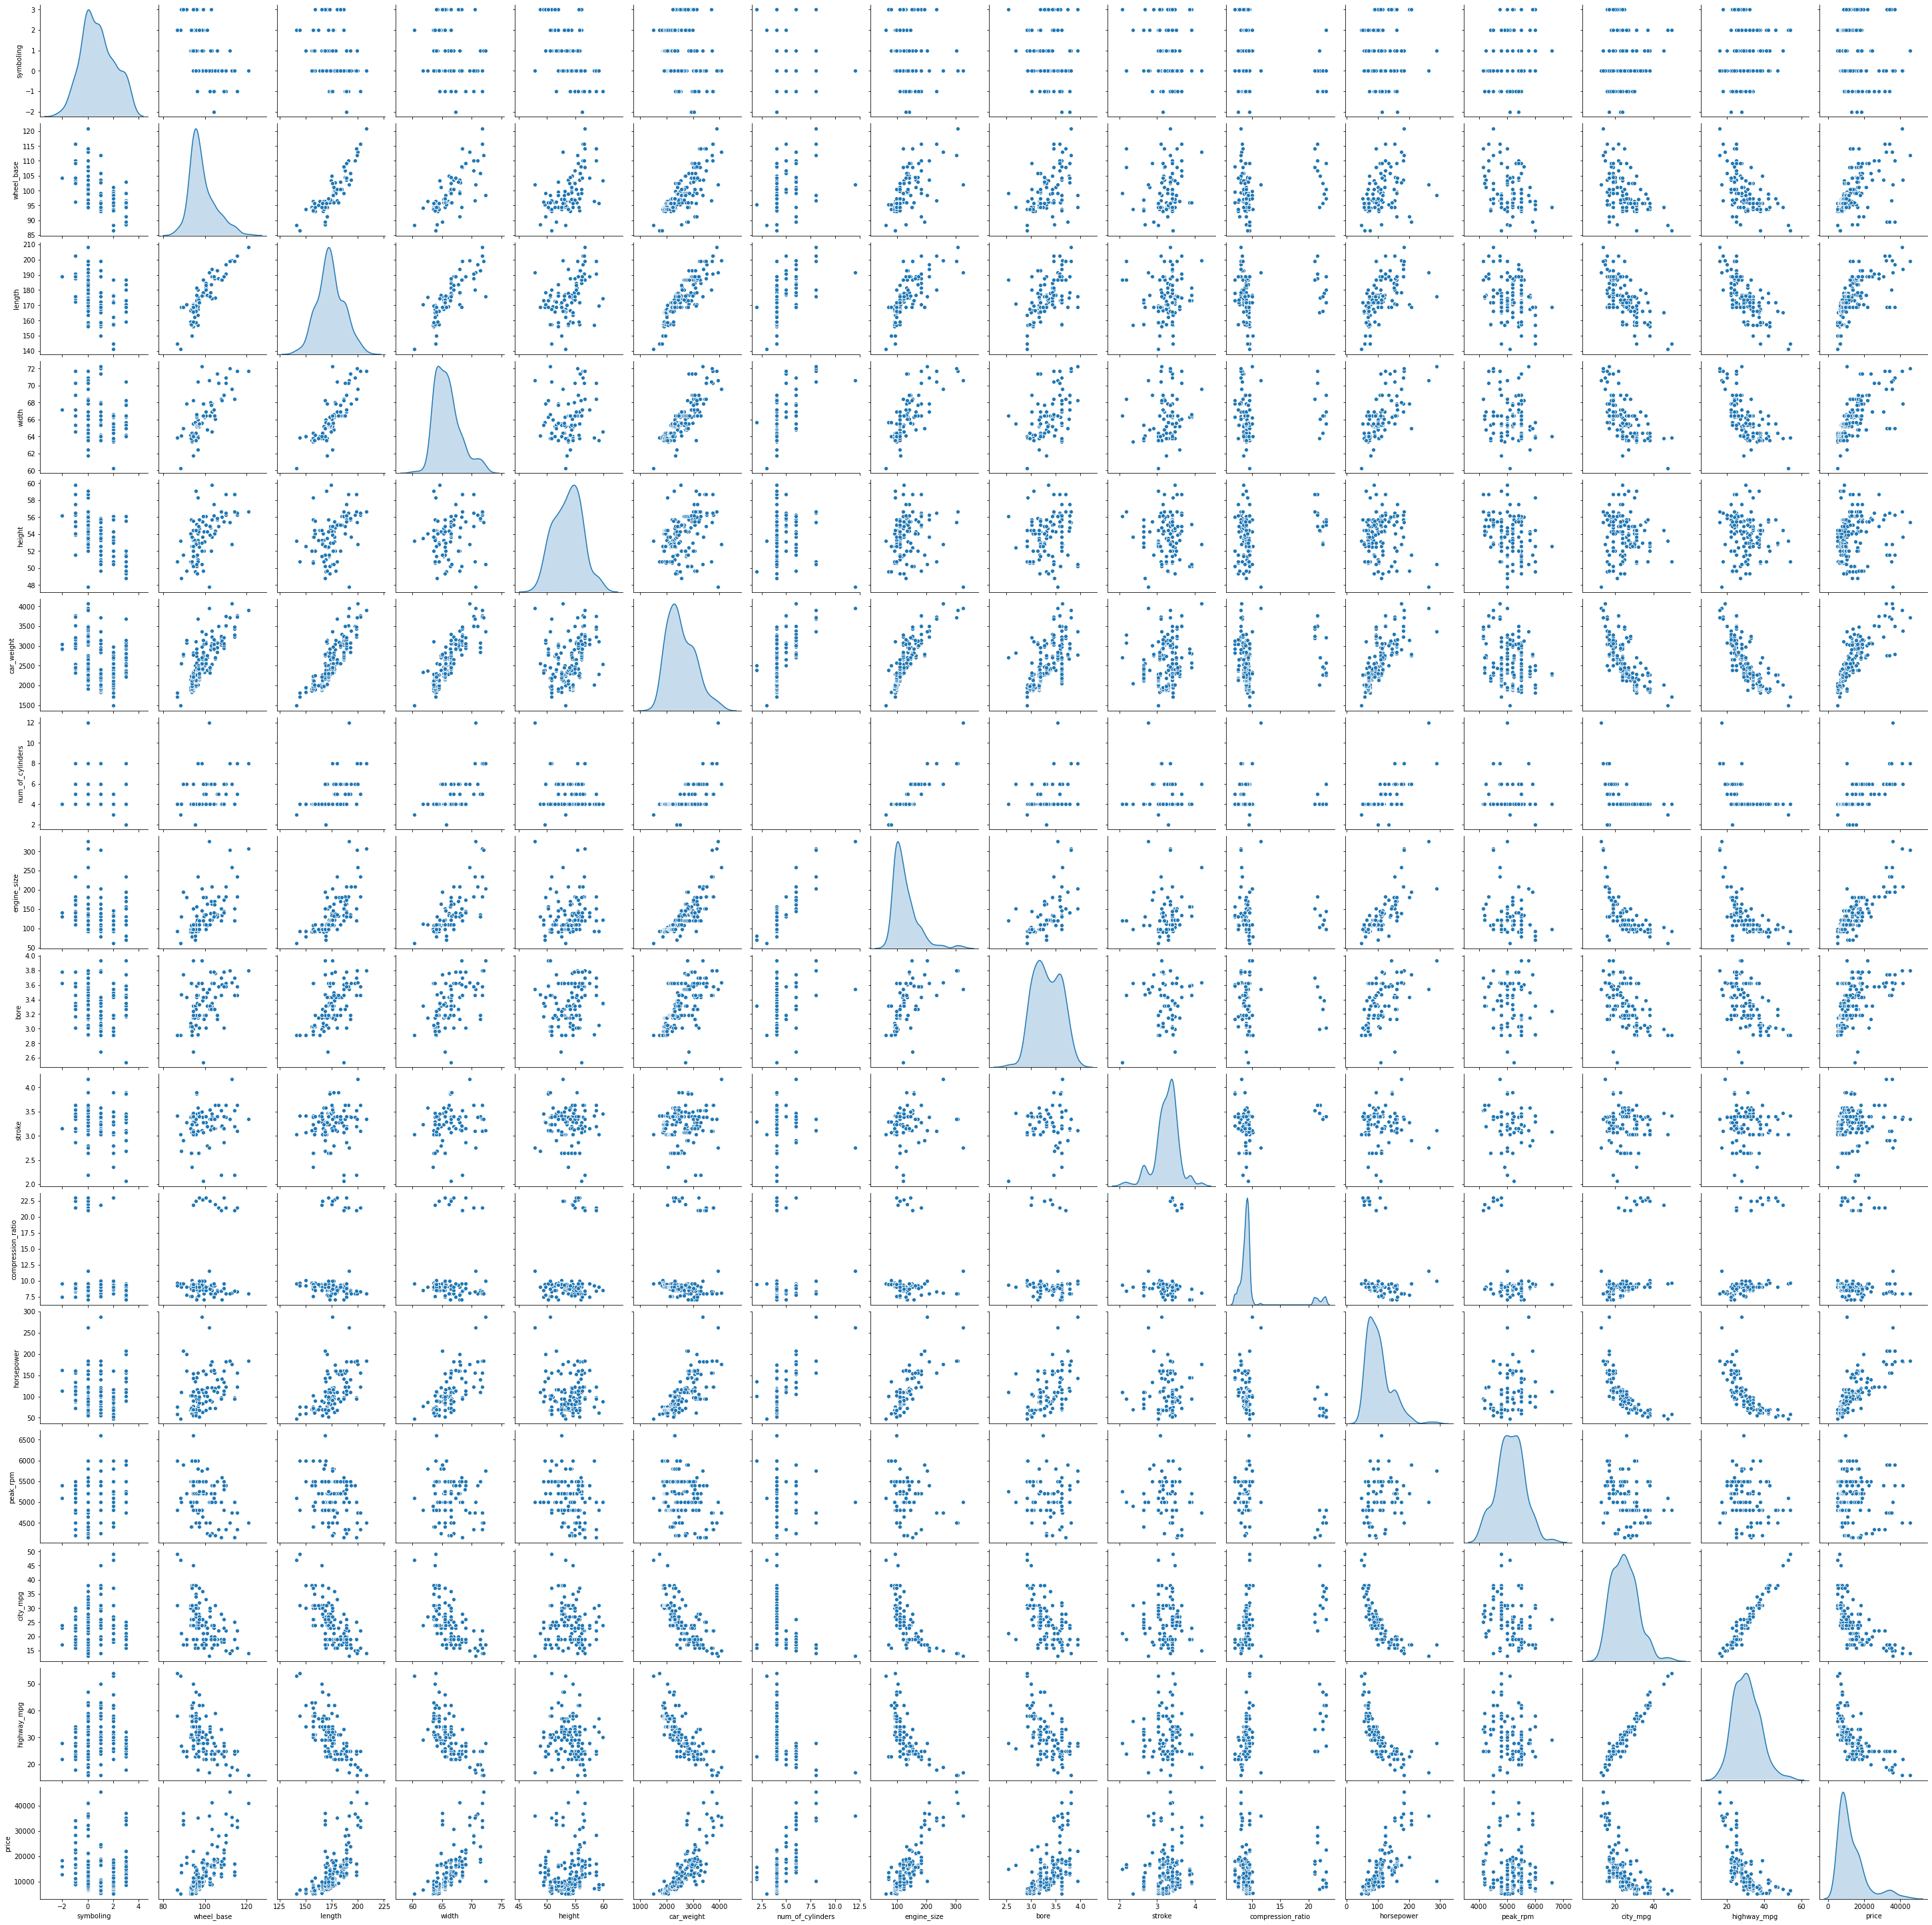

In [10]:
import seaborn as sns
sns.pairplot(car_df,diag_kind='kde')

In [11]:
#Copy all the independent variables into X dataframe and drop price column since it is the dependent/target variable

X = car_df.drop('price',axis=1)

y = car_df[['price']]


In [12]:
#Split X and y dataframes into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)



In [13]:
#Invoke Linear regression model and find the best fit model on your training data

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

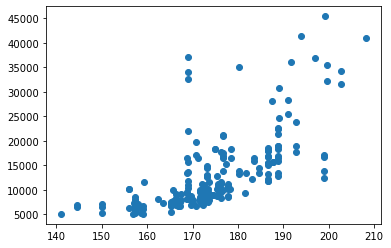

In [14]:
#checking the relationship between price and length of the car
import matplotlib.pyplot as plt

plt.scatter('length','price',data=car_df)
plt.show()

In [15]:
#Explore coefficients for each independent attributes

for idx,col in enumerate(X_train.columns):
    print('The coefficient of {} is {}'.format(col,lr.coef_[0][idx]))
    
    
#Observation:
#If we look at the length column for every one unit increase in length of the car the price is dropping by 93% which 
#is kind of odd since both the wheel_base and length had a positive relation with the price of the car

The coefficient of symboling is 88.57794900973524
The coefficient of wheel_base is 71.82402760934926
The coefficient of length is -93.38447872012017
The coefficient of width is 479.81643559267957
The coefficient of height is 315.2038400121221
The coefficient of car_weight is -0.8657326891350731
The coefficient of num_of_cylinders is -3176.176090372958
The coefficient of engine_size is 251.74362582792062
The coefficient of bore is -6832.550987635421
The coefficient of stroke is -5085.8188597905955
The coefficient of compression_ratio is 335.76825192964094
The coefficient of horsepower is -0.03898796131258805
The coefficient of peak_rpm is 2.4300494935823944
The coefficient of city_mpg is -201.8171320034707
The coefficient of highway_mpg is -41.93431935731847


In [16]:
print('The intercept is',lr.intercept_)

The intercept is [-12323.06017457]


In [22]:
#Predicting prices 
y_pred = lr.predict(X_test)
y_pred



array([[ 7477.07906159],
       [ 5812.48219021],
       [ 6788.09725479],
       [ 5582.17247056],
       [ 8753.13856586],
       [25670.86210191],
       [ 6634.61896979],
       [ -151.31142629],
       [ 6809.74057202],
       [11048.75384582],
       [15792.55794729],
       [14269.82521977],
       [16416.56846553],
       [10606.07306503],
       [15647.3410285 ],
       [14210.87825574],
       [10046.98919965],
       [ 9512.67430377],
       [14206.35264468],
       [ 9413.14439311],
       [ 8977.43393194],
       [ 8715.42853221],
       [12086.00589237],
       [ 8422.52411064],
       [14321.69203995],
       [ 9498.82258074],
       [15819.54003351],
       [ 9678.60238816],
       [ 6566.11534107],
       [ 8912.137625  ],
       [ 6374.38765022],
       [12843.12330484],
       [26824.90948293],
       [11366.37996462],
       [18343.23776691],
       [ 9681.19958623],
       [ 8304.94218322],
       [33985.79174565],
       [11975.98692542],
       [18064.17802285],


In [21]:
print(y_pred.shape)
print(y_test.shape)

(52, 1)
(52, 1)


In [20]:
# Checking the efficiency of the model

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8362176483290367